In [333]:
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd
import os

df_path = r"C:\MSAI\Cases in ML\Final Project\Datasets"
df = pd.read_csv(os.path.join(df_path, 'final.csv'), low_memory=False)
cpi = pd.read_csv(os.path.join(df_path, 'cpi.csv'))
cpi = cpi.dropna(subset=['Year']).reset_index(drop=True)
cpi['Year'] = cpi['Year'].astype(str).str.replace(r'\D', '', regex=True).astype(int)
df = df.merge(cpi, left_on='release_year', right_on='Year', how='left')

target_cpi = cpi.loc[cpi['Year'] == 2024, 'Annual Average CPI'].values[0]
df['budget_normalized'] = df['budget'] * (target_cpi / df['Annual Average CPI'])
df['revenue_normalized'] = df['revenue'] * (target_cpi / df['Annual Average CPI'])
df['cast_list'] = df['cast'].fillna('').str.replace(', Jr.', ' Jr.').apply(lambda x: [name.strip() for name in x.split(',')])
df['director_list'] = df['director'].fillna('').apply(lambda x: [name.strip() for name in x.split(',')])
df['writers_list'] = df['writers'].fillna('').apply(lambda x: [name.strip() for name in x.split(',')])
df['producers_list'] = df['producers'].fillna('').apply(lambda x: [name.strip() for name in x.split(',')])
df['production_companies_list'] = df['production_companies'].fillna('').apply(lambda x: [name.strip() for name in x.split(',')])
df = df[df['revenue_normalized'] > 0]
df['imdb_rating'] = df['imdb_rating'].fillna(df['imdb_rating'].mean())
df['overview_sentiment'] = df['overview'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.isna(x) else 0)
df['tagline_sentiment'] = df['tagline'].apply(lambda x: TextBlob(str(x)).sentiment.polarity if pd.isna(x) else 0)
df.fillna({'genres': 'n/a'}, inplace=True)
df.reset_index(drop=True, inplace=True)
vectorizer = CountVectorizer(tokenizer=lambda x: x.split(', '))
genre_vectors = vectorizer.fit_transform(df['genres'])
genre_df = pd.DataFrame(genre_vectors.toarray(), columns=vectorizer.get_feature_names_out())
genre_df.reset_index(drop=True, inplace=True)
df = pd.concat([df, genre_df], axis=1)

df['log_revenue'] = np.log1p(df['revenue_normalized'])
df['log_budget'] = np.log1p(df['budget_normalized'])

df.drop(columns=['id',
                 'imdb_id',
                 'imdb_votes',
                 'production_countries',
                 'popularity',
                 'overview',
                 'tagline',
                 'release_date',
                 'budget',
                 'revenue',
                 'cast',
                 'director',
                 'writers',
                 'producers',
                 'production_companies',
                 'Year',
                 'Annual Average CPI',
                 'title_processed',
                 'original_title',
                 'genres'],
        inplace=True)

df.to_csv(os.path.join(df_path, 'final_normalized.csv'), index=False)
df

C:\Users\delsa\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\feature_extraction\text.py:521: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


,title,release_year,runtime,imdb_rating,budget_normalized,revenue_normalized,cast_list,director_list,writers_list,producers_list,...,mystery,n/a,romance,science fiction,thriller,tv movie,war,western,log_revenue,log_budget
0,Four Rooms,1995,98.0,6.700000,8.251969e+06,8.872929e+06,"[Quentin Tarantino, Jennifer Beals, Antonio Ba...","[Alexandre Rockwell, Quentin Tarantino, Alliso...","[Alexandre Rockwell, Quentin Tarantino, Alliso...","[Alexandre Rockwell, Quentin Tarantino, Lawren...",...,0,0,0,0,0,0,0,0,15.998516,15.925962
1,Judgment Night,1993,109.0,6.600000,4.569135e+07,2.725528e+07,"[Cuba Gooding Jr., Peter Greene, David L. Crow...",[Stephen Hopkins],"[Jere Cunningham, Lewis Colick]","[Gene Levy, Lloyd Segan, Marilyn Vance]",...,0,0,0,0,1,0,0,0,17.120758,17.637420
2,Life in Loops (A Megacities RMX),2006,80.0,8.200000,6.550000e+04,2.917869e+03,[],[Timo Novotny],"[Michael Glawogger, Timo Novotny]","[Ulrich Gehmacher, Timo Novotny]",...,0,0,0,0,0,0,0,0,7.978952,11.089821
3,Star Wars,1977,121.0,8.600000,5.706931e+07,4.022860e+09,"[Lightning Bear, Geoffrey Moon, Alfie Curtis, ...",[George Lucas],[George Lucas],"[George Lucas, Rick McCallum, Gary Kurtz]",...,0,0,0,1,0,0,0,0,22.115259,17.859777
4,Finding Nemo,2003,100.0,8.200000,1.606174e+08,1.608973e+09,"[Bob Bergen, Ellen DeGeneres, Joe Ranft, Eliza...",[Andrew Stanton],"[Jim Capobianco, Blake Tucker, Andrew Stanton,...","[Graham Walters, John Lasseter]",...,0,0,0,0,0,0,0,0,21.198862,18.894536
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20323,Hidden Secrets II 2022,2022,65.0,6.197718,1.059099e+03,5.370687e+02,"[Justin Butler, Lisa Carter, Mandy Jackson, Ri...",[Cajun Miller],"[Neon Wings, Kaley Johnson]",[],...,0,0,0,0,0,0,0,0,6.287986,6.966118
20324,Hidden Secrets III,2023,75.0,6.197718,6.706925e+02,5.943367e+02,[Neon Wings],[],[],[],...,0,0,0,0,0,1,0,0,6.389127,6.509801
20325,Flying Knives,2024,1.0,6.197718,1.000000e+02,1.000000e+01,"[Knifey, Dez Pearson, Blargh, Zep]",[Dez Pearson],[Dez Pearson],[Dez Pearson],...,0,0,0,0,0,0,0,0,2.397895,4.615121
20326,Woody Allen Takes Revenge,2022,20.0,6.197718,1.074137e+04,1.074137e+04,"[Amir Arshia Barati, Peyman Naji, Saman Saffar...",[Peyman Naji],[Peyman Naji],[Sharareh Mahmoodi],...,0,0,0,0,0,0,0,0,9.281951,9.281951


In [51]:
def apply_person_normalized_values(df, cast_column, sorted_vals, field_name):
    person_value_dict = {person['person']: person['normalized_person_value'] for person in sorted_vals}
     
    def calculate_movie_person_value(cast_list):
        if not cast_list or not isinstance(cast_list, list): return 0

        total_persons = len(cast_list)
        person_value_sum = 0

        for position, person in enumerate(cast_list):
            normalized_value = person_value_dict.get(person, 0)
            weight = (total_persons - position) / total_persons
            person_value_sum += weight * normalized_value

        return person_value_sum
    
    df[f'normalized_{field_name}_value'] = df[cast_column].apply(calculate_movie_person_value)
    col_min = df[f'normalized_{field_name}_value'].min()
    col_max = df[f'normalized_{field_name}_value'].max()
    df[f'normalized_{field_name}_value'] = ((df[f'normalized_{field_name}_value'] - col_min) / (col_max - col_min) if col_max != col_min else 0)
    
    return df

def get_persons_values(df, sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies):
    for field_name, field_lst, sorted_vals in [('cast', 'cast_list', sorted_actors),
                                               ('director', 'director_list', sorted_directors),
                                               ('writers', 'writers_list', sorted_writers),
                                               ('producers', 'producers_list', sorted_producers),
                                               ('production_companies', 'production_companies_list', sorted_production_companies)]:
    
        df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
        df_with_person_values = apply_person_normalized_values(df, field_lst, sorted_vals, field_name)
    
    df_with_person_values[['title',
                           'normalized_cast_value',
                           'normalized_director_value',
                           'normalized_writers_value',
                           'normalized_producers_value',
                           'normalized_production_companies_value']].head(10)
    return df_with_person_values

df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
get_persons_values(df)

,title,normalized_cast_value,normalized_director_value,normalized_writers_value,normalized_producers_value,normalized_production_companies_value
0,Four Rooms,0.072084,0.088034,0.009756,0.007726,0.019587
1,Judgment Night,0.023316,0.013224,0.002234,0.004026,0.204323
2,Life in Loops (A Megacities RMX),0.003881,0.013029,0.002304,0.004088,0.000120
3,Star Wars,0.095028,0.051649,0.126548,0.034715,0.160714
4,Finding Nemo,0.280406,0.034845,0.024370,0.060267,0.020912
5,Forrest Gump,0.044976,0.313558,0.007507,0.017264,0.443559
6,American Beauty,0.035616,0.085912,0.004040,0.006142,0.018007
7,Citizen Kane,0.058655,0.015595,0.002866,0.004119,0.001732
8,Dancer in the Dark,0.027956,0.015024,0.002613,0.004159,0.000213
9,The Dark,0.020230,0.014616,0.002139,0.016585,0.002074


In [43]:
# CPI - https://www.minneapolisfed.org/about-us/monetary-policy/inflation-calculator/consumer-price-index-1913-
cpi = pd.read_csv(os.path.join(df_path, 'cpi.csv'))
cpi = cpi.dropna(subset=['Year']).reset_index(drop=True)
cpi

,Year,Annual Average CPI
0,1913,9.9
1,1914,10.0
2,1915,10.1
3,1916,10.9
4,1917,12.8
...,...,...
107,2020,258.8
108,2021,271.0
109,2022,292.7
110,2023,304.7


In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.pipeline import FeatureUnion
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from textblob import TextBlob

df = pd.read_csv(os.path.join(df_path, 'final.csv'))
analyzer = SentimentIntensityAnalyzer()

def textblob_sentiment(text):
    if pd.isnull(text):
        return 0
    return TextBlob(text).sentiment.polarity

def vader_sentiment(text):
    if pd.isnull(text):
        return 0
    scores = analyzer.polarity_scores(text)
    return scores['compound']

df['overview_sentiment_blob'] = df['overview'].apply(textblob_sentiment)
df['tagline_sentiment_blob'] = df['tagline'].apply(textblob_sentiment)
df['overview_sentiment_vader'] = df['overview'].apply(vader_sentiment)
df['tagline_sentiment_vader'] = df['tagline'].apply(vader_sentiment)

print(df[['overview', 'overview_sentiment_blob', 'overview_sentiment_vader']].head())
print(df[['tagline', 'tagline_sentiment_blob', 'tagline_sentiment_vader']].head())

                                            overview  overview_sentiment_blob  \
0  It's Ted the Bellhop's first night on the job....                -0.185000   
1  Four young friends, while taking a shortcut en...                -0.258333   
2  Timo Novotny labels his new project an experim...                 0.212007   
3  Princess Leia is captured and held hostage by ...                -0.075000   
4  Nemo, an adventurous young clownfish, is unexp...                 0.325000   

   overview_sentiment_vader  
0                   -0.2960  
1                   -0.7717  
2                    0.9552  
3                    0.8979  
4                    0.1531  
                                             tagline  tagline_sentiment_blob  \
0  Twelve outrageous guests. Four scandalous requ...               -0.204545   
1     Don't move. Don't whisper. Don't even breathe.                0.000000   
2                                A Megacities remix.                0.000000   
3       A lon

In [19]:
df[['overview', 'overview_sentiment_blob', 'overview_sentiment_vader']].head()

,overview,overview_sentiment_blob,overview_sentiment_vader
0,It's Ted the Bellhop's first night on the job....,-0.185000,-0.2960
1,"Four young friends, while taking a shortcut en...",-0.258333,-0.7717
2,Timo Novotny labels his new project an experim...,0.212007,0.9552
3,Princess Leia is captured and held hostage by ...,-0.075000,0.8979
4,"Nemo, an adventurous young clownfish, is unexp...",0.325000,0.1531


In [340]:
import pandas as pd
from datetime import datetime
from collections import defaultdict

def calculate_avg_person_value(person_data_df):
    total_value = 0
    total_count = 0

    for person, data in person_data_df.items():
        total_value += sum(data['role_values'])  
        total_count += data['appearance_count']

    avg_person_value = total_value / total_count if total_count > 0 else 0
    return avg_person_value

def calculate_person_avg_ratings(df, field_name):
    person_ratings = defaultdict(list)
    person_budgets = defaultdict(list)
    
    for _, row in df.iterrows():
        try:
            persons = row[field_name]
            imdb_rating = row['imdb_rating']
            budget = row['budget_normalized']
            
            for person in persons:
                if imdb_rating and imdb_rating != 0:
                    person_ratings[person].append(imdb_rating)
                if budget and budget != 0:
                    person_budgets[person].append(budget)
        except (ValueError, SyntaxError):
            continue
    
    person_avg_ratings = {person: sum(ratings)/len(ratings) for person, ratings in person_ratings.items() if ratings}
    person_avg_budgets = {person: sum(budgets)/len(budgets) for person, budgets in person_budgets.items() if budgets}
    return person_avg_ratings, person_avg_budgets

def extract_person_features(df, person_avg_ratings, person_avg_budgets, field_name):
    person_data = defaultdict(dict)
    current_year = datetime.now().year
    avg_rating = df['imdb_rating'].mean()
    avg_budget = df['budget_normalized'].fillna(pd.NA).mean()

    for _, row in df.iterrows():
        persons = row[field_name]
        revenue = row['revenue_normalized']
        budget = row['budget_normalized']
        imdb_rating = row['imdb_rating']
        release_year = row['release_year']
        
        # Time-based weighting
        time_weight = 1 / (current_year - release_year + 1)
        # time_weight = 1
        num_cast = len(persons) if persons else 1
        
        for i, person in enumerate(persons):
            if person:
                if person not in person_data:
                    person_data[person] = {
                        'total_revenue': 0,
                        'total_budget': 0,
                        'weighted_imdb_sum': 0,
                        'total_weight': 0,
                        'appearance_count': 0,
                        'movies': [],
                        'role_values': []
                    }
            
                coefficient = (num_cast - i) / num_cast
                person_rating = imdb_rating if imdb_rating else person_avg_ratings.get(person, avg_rating)
                person_value = person_rating * coefficient * time_weight
                person_data[person]['total_revenue'] += revenue
                person_data[person]['total_budget'] += budget if budget else person_avg_budgets.get(person, avg_budget)
                person_data[person]['weighted_imdb_sum'] += person_rating * time_weight
                person_data[person]['total_weight'] += time_weight
                person_data[person]['appearance_count'] += 1
                person_data[person]['movies'].append(row['title'])
                person_data[person]['role_values'].append(person_value)
    
    return person_data

def calculate_person_metrics(person_data,
                             avg_imdb=0,
                             avg_profit=0,
                             avg_box_office=0,
                             std_imdb=1,
                             std_profit=1):
    epsilon = 1e-6
    person_metrics = []
    
    for person, data in person_data.items():
        if person:
            total_revenue = data['total_revenue']
            total_budget = data['total_budget']
            weighted_avg_imdb = (data['weighted_imdb_sum'] / data['total_weight'] if data['total_weight'] > 0 else avg_imdb)
            appearance_count = data['appearance_count']
            
            total_person_value = sum(data['role_values'])
            profitability = max(total_revenue - total_budget, 0) 
            box_office_performance = (total_revenue / total_budget if total_budget > 0 else avg_box_office)
            box_office_performance = min(box_office_performance, 50)  
            normalized_imdb = ((weighted_avg_imdb - avg_imdb) / std_imdb if std_imdb > 0 else 0)
            normalized_profitability = ((profitability - avg_profit) / std_profit if std_profit > 0 else 0)
            # normalized_box_office = ((box_office_performance - avg_box_office) / std_box_office if std_box_office > 0 else 0)
            normalized_box_office = box_office_performance / avg_box_office if avg_box_office > 0 else 1
            normalized_person_value = total_person_value * (0.3 * normalized_imdb + 0.4 * normalized_profitability + 0.3 * normalized_box_office)
            
            person_metrics.append({
                'person': person,
                'normalized_person_value': normalized_person_value,
                'total_person_value': total_person_value,
                'profitability': profitability,
                'normalized_profitability': normalized_profitability,
                'appearance_count': appearance_count,
                'weighted_avg_imdb': weighted_avg_imdb,
                'box_office_performance': box_office_performance,
                'normalized_box_office': normalized_box_office,
                'movies': data['movies']
            })
    
    return person_metrics

def get_sorted_person_calculated_data(df, field_lst):
    avg_rating = df[df['imdb_rating'] > 0]['imdb_rating'].mean()
    std_rating = df[df['imdb_rating'] > 0]['imdb_rating'].std()
    avg_profitability = (df['revenue_normalized'] - df['budget_normalized']).mean()
    std_profitability = (df['revenue_normalized'] - df['budget_normalized']).std()
    avg_box_office = df['revenue_normalized'].mean() / df['budget_normalized'].mean()
    person_avg_ratings, person_avg_budgets = calculate_person_avg_ratings(df, field_lst)
    person_data_df = extract_person_features(df, person_avg_ratings, person_avg_budgets, field_lst)
    person_metrics = calculate_person_metrics(
        person_data_df,
        avg_imdb=avg_rating,
        std_imdb=std_rating,
        avg_profit=avg_profitability,
        std_profit=std_profitability,
        avg_box_office=avg_box_office
    )
    return sorted(person_metrics, key=lambda x: x['normalized_person_value'], reverse=True)

def fit_person_data(df):
    sorted_actors = []
    sorted_directors = []
    sorted_writers = []
    sorted_producers = []
    sorted_production_companies = []
    
    for field_lst in ('cast_list', 'director_list', 'writers_list', 'producers_list', 'production_companies_list'):
        df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
    
    sorted_actors = get_sorted_person_calculated_data(df, 'cast_list')
    sorted_directors = get_sorted_person_calculated_data(df, 'director_list')
    sorted_writers = get_sorted_person_calculated_data(df, 'writers_list')
    sorted_producers = get_sorted_person_calculated_data(df, 'producers_list')
    sorted_production_companies = get_sorted_person_calculated_data(df, 'production_companies_list')
    return sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies

def transform_person_data(df, sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies):
    df = get_persons_values(df, sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies)
    return df

In [352]:
### ACTOR
field_name = 'Actor'
field_lst = 'cast_list'
df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
# sorted_actors = get_sorted_person_calculated_data(df, field_lst)
# df_actors = df[~df['genres'].fillna('').str.lower().str.contains('animation')]
df_actors = df[df['animation'] == 0]
sorted_actors = get_sorted_person_calculated_data(df_actors, field_lst)

# Display top 10 actors
for i, person in enumerate(sorted_actors[:10], 1):
    print(f"{i}. {person['person']}:")
    print(f"   Normalized Score: {person['normalized_person_value']:.2f}")
    print(f"   Total {field_name} Value: {person['total_person_value']:.2f}")
    print(f"   Total Profitability: ${person['profitability']:,.2f}")
    print(f"   Normalized Profitability: ${person['normalized_profitability']:,.2f}")
    print(f"   Box Office Avg Performance: {person['box_office_performance']:.2f}")
    # print(f"   Normalized Box Office Performance: {person['normalized_box_office']:.2f}")
    print(f"   Appearances: {person['appearance_count']}")
    print(f"   Weighted Avg IMDb Rating: {person['weighted_avg_imdb']:.2f}")
    print(f"   Top Movies: \"{'", "'.join(person['movies'][:5])}\"")
    print()

1. Samuel L. Jackson:
   Normalized Score: 1289.16
   Total Actor Value: 44.63
   Total Profitability: $28,827,185,506.81
   Normalized Profitability: $71.36
   Box Office Avg Performance: 3.29
   Appearances: 131
   Weighted Avg IMDb Rating: 6.40
   Top Movies: "Jackie Brown", "True Romance", "Snakes on a Plane", "Jurassic Park", "Kill Bill: Vol. 2"

2. Willem Dafoe:
   Normalized Score: 738.07
   Total Actor Value: 50.40
   Total Profitability: $14,450,895,321.16
   Normalized Profitability: $35.66
   Box Office Avg Performance: 2.82
   Appearances: 98
   Weighted Avg IMDb Rating: 6.69
   Top Movies: "Inside Man", "The English Patient", "The Life Aquatic with Steve Zissou", "Wild at Heart", "Basquiat"

3. Chris Evans:
   Normalized Score: 614.69
   Total Actor Value: 34.87
   Total Profitability: $17,300,433,686.80
   Normalized Profitability: $42.73
   Box Office Avg Performance: 3.56
   Appearances: 43
   Weighted Avg IMDb Rating: 7.02
   Top Movies: "Street Kings", "Sunshine", "Ca

In [351]:
### DIRECTOR
field_name = 'Director'
field_lst = 'director_list'
df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
#df['imdb_rating'] = df['imdb_rating'].fillna(0)
df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
sorted_directors = get_sorted_person_calculated_data(df, field_lst)

# Display top 10 directors
for i, person in enumerate(sorted_directors[:10], 1):
    print(f"{i}. {person['person']}:")
    print(f"   Normalized Score: {person['normalized_person_value']:.2f}")
    print(f"   Total {field_name} Value: {person['total_person_value']:.2f}")
    print(f"   Total Profitability: ${person['profitability']:,.2f}")
    print(f"   Normalized Profitability: ${person['normalized_profitability']:,.2f}")
    print(f"   Box Office Avg Performance: {person['box_office_performance']:.2f}")
    # print(f"   Normalized Box Office Performance: {person['normalized_box_office']:.2f}")
    print(f"   Appearances: {person['appearance_count']}")
    print(f"   Weighted Avg IMDb Rating: {person['weighted_avg_imdb']:.2f}")
    print(f"   Top Movies: \"{'", "'.join(person['movies'][:5])}\"")
    print()

1. Steven Spielberg:
   Normalized Score: 333.06
   Total Director Value: 15.48
   Total Profitability: $21,859,874,164.80
   Normalized Profitability: $51.64
   Box Office Avg Performance: 6.68
   Appearances: 36
   Weighted Avg IMDb Rating: 7.29
   Top Movies: "War of the Worlds", "Raiders of the Lost Ark", "Indiana Jones and the Temple of Doom", "Indiana Jones and the Last Crusade", "Minority Report"

2. Sam Liu:
   Normalized Score: 146.78
   Total Director Value: 17.01
   Total Profitability: $8,702,979,710.10
   Normalized Profitability: $20.41
   Box Office Avg Performance: 4.60
   Appearances: 21
   Weighted Avg IMDb Rating: 6.52
   Top Movies: "Superman/Batman: Public Enemies", "Justice League: Crisis on Two Earths", "Planet Hulk", "All Star Superman", "Thor: Tales of Asgard"

3. Robert Zemeckis:
   Normalized Score: 102.45
   Total Director Value: 15.78
   Total Profitability: $6,587,260,468.26
   Normalized Profitability: $15.38
   Box Office Avg Performance: 3.61
   Appeara

In [353]:
### WRITER
field_name = 'Writer'
field_lst = 'writers_list'
df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
#df['imdb_rating'] = df['imdb_rating'].fillna(0)
df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
sorted_writers = get_sorted_person_calculated_data(df, field_lst)

# Display top 10 writers
for i, person in enumerate(sorted_writers[:10], 1):
    print(f"{i}. {person['person']}:")
    print(f"   Normalized Score: {person['normalized_person_value']:.2f}")
    print(f"   Total {field_name} Value: {person['total_person_value']:.2f}")
    print(f"   Total Profitability: ${person['profitability']:,.2f}")
    print(f"   Normalized Profitability: ${person['normalized_profitability']:,.2f}")
    print(f"   Box Office Avg Performance: {person['box_office_performance']:.2f}")
    # print(f"   Normalized Box Office Performance: {person['normalized_box_office']:.2f}")
    print(f"   Appearances: {person['appearance_count']}")
    print(f"   Weighted Avg IMDb Rating: {person['weighted_avg_imdb']:.2f}")
    print(f"   Top Movies: \"{'", "'.join(person['movies'][:5])}\"")
    print()

1. Stan Lee:
   Normalized Score: 1167.71
   Total Writer Value: 31.57
   Total Profitability: $38,606,424,836.13
   Normalized Profitability: $91.39
   Box Office Avg Performance: 4.10
   Appearances: 47
   Weighted Avg IMDb Rating: 6.53
   Top Movies: "Spider-Man", "Spider-Man 2", "Spider-Man 3", "The Incredible Hulk", "Iron Man"

2. Jack Kirby:
   Normalized Score: 1018.32
   Total Writer Value: 31.76
   Total Profitability: $33,309,327,386.48
   Normalized Profitability: $78.82
   Box Office Avg Performance: 3.99
   Appearances: 50
   Weighted Avg IMDb Rating: 6.94
   Top Movies: "The Incredible Hulk", "Iron Man", "Captain America: The First Avenger", "Hulk", "Fantastic Four: Rise of the Silver Surfer"

3. Bob Kane:
   Normalized Score: 675.63
   Total Writer Value: 30.51
   Total Profitability: $22,963,869,660.67
   Normalized Profitability: $54.26
   Box Office Avg Performance: 4.12
   Appearances: 50
   Weighted Avg IMDb Rating: 6.57
   Top Movies: "The Dark Knight", "Batman", "

In [354]:
### PRODUCER
field_name = 'Producer'
field_lst = 'producers_list'
df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
#df['imdb_rating'] = df['imdb_rating'].fillna(0)
df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
sorted_producers = get_sorted_person_calculated_data(df, field_lst)

# Display top 10 producers
for i, person in enumerate(sorted_producers[:10], 1):
    print(f"{i}. {person['person']}:")
    print(f"   Normalized Score: {person['normalized_person_value']:.2f}")
    print(f"   Total {field_name} Value: {person['total_person_value']:.2f}")
    print(f"   Total Profitability: ${person['profitability']:,.2f}")
    print(f"   Normalized Profitability: ${person['normalized_profitability']:,.2f}")
    print(f"   Box Office Avg Performance: {person['box_office_performance']:.2f}")
    # print(f"   Normalized Box Office Performance: {person['normalized_box_office']:.2f}")
    print(f"   Appearances: {person['appearance_count']}")
    print(f"   Weighted Avg IMDb Rating: {person['weighted_avg_imdb']:.2f}")
    print(f"   Top Movies: \"{'", "'.join(person['movies'][:5])}\"")
    print()

1. Sam Register:
   Normalized Score: 2258.69
   Total Producer Value: 60.48
   Total Profitability: $38,924,761,976.90
   Normalized Profitability: $92.15
   Box Office Avg Performance: 5.41
   Appearances: 78
   Weighted Avg IMDb Rating: 6.34
   Top Movies: "Wonder Woman", "Green Lantern: First Flight", "Superman/Batman: Public Enemies", "Batman: Under the Red Hood", "Superman/Shazam!: The Return of Black Adam"

2. Louis D'Esposito:
   Normalized Score: 1951.85
   Total Producer Value: 54.59
   Total Profitability: $37,091,562,911.19
   Normalized Profitability: $87.79
   Box Office Avg Performance: 4.56
   Appearances: 49
   Weighted Avg IMDb Rating: 7.12
   Top Movies: "Iron Man", "Captain America: The First Avenger", "Zathura: A Space Adventure", "S.W.A.T.", "Iron Man 2"

3. Kevin Feige:
   Normalized Score: 1439.03
   Total Producer Value: 35.05
   Total Profitability: $42,723,163,124.36
   Normalized Profitability: $101.16
   Box Office Avg Performance: 4.17
   Appearances: 64
 

In [355]:
### PRODUCTION COMPANY
field_name = 'Production Company'
field_lst = 'production_companies_list'
df = pd.read_csv(os.path.join(df_path, 'final_normalized.csv'))
#df['imdb_rating'] = df['imdb_rating'].fillna(0)
df[field_lst] = df[field_lst].apply(lambda x: eval(x) if isinstance(x, str) else x)
sorted_production_companies = get_sorted_person_calculated_data(df, field_lst)

# Display top 10 production_companies
for i, person in enumerate(sorted_production_companies[:10], 1):
    print(f"{i}. {person['person']}:")
    print(f"   Normalized Score: {person['normalized_person_value']:.2f}")
    print(f"   Total {field_name} Value: {person['total_person_value']:.2f}")
    print(f"   Total Profitability: ${person['profitability']:,.2f}")
    print(f"   Normalized Profitability: ${person['normalized_profitability']:,.2f}")
    print(f"   Box Office Avg Performance: {person['box_office_performance']:.2f}")
    # print(f"   Normalized Box Office Performance: {person['normalized_box_office']:.2f}")
    print(f"   Appearances: {person['appearance_count']}")
    print(f"   Weighted Avg IMDb Rating: {person['weighted_avg_imdb']:.2f}")
    print(f"   Top Movies: \"{'", "'.join(person['movies'][:5])}\"")
    print()

1. Universal Pictures:
   Normalized Score: 26520.51
   Total Production Company Value: 260.60
   Total Profitability: $107,043,988,472.99
   Normalized Profitability: $253.85
   Box Office Avg Performance: 2.79
   Appearances: 822
   Weighted Avg IMDb Rating: 6.20
   Top Movies: "Judgment Night", "Twelve Monkeys", "Billy Elliot", "Miami Vice", "Gladiator"

2. Warner Bros. Pictures:
   Normalized Score: 19915.36
   Total Production Company Value: 210.89
   Total Profitability: $99,297,239,977.38
   Normalized Profitability: $235.46
   Box Office Avg Performance: 2.36
   Appearances: 890
   Weighted Avg IMDb Rating: 6.40
   Top Movies: "Unforgiven", "Million Dollar Baby", "Mars Attacks!", "Blade Runner", "Charlie and the Chocolate Factory"

3. Paramount Pictures:
   Normalized Score: 19118.65
   Total Production Company Value: 206.37
   Total Profitability: $97,393,856,356.03
   Normalized Profitability: $230.94
   Box Office Avg Performance: 2.74
   Appearances: 694
   Weighted Avg IMD

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
  
features = [
    'runtime',
    'release_year',
    'overview_sentiment',
    'tagline_sentiment',
    'log_budget',
    'action',
    'adventure',
    'animation',
    'comedy',
    'crime',
    'documentary',
    'drama',
    'family',
    'fantasy',
    'history',
    'horror',
    'music',
    'mystery',
    'romance',
    'science fiction',
    'thriller',
    'tv movie',
    'war',
    'western',
    'normalized_cast_value',
    'normalized_director_value',
    'normalized_writers_value',
    'normalized_producers_value',
    'normalized_production_companies_value'
]

y = df_with_person_values['log_revenue']

# Split data
print("[START] Splitting data for ML")
X_train, X_test, y_train, y_test = train_test_split(df_with_person_values[features], y, test_size=0.2, random_state=42)

# Apply Person scores based on Train data
sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies = fit_person_data(X_train)
X_train = transform_person_data(X_train, sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies)
X_test = transform_person_data(X_test, sorted_actors, sorted_directors, sorted_writers, sorted_producers, sorted_production_companies)

name_mapping = {
    'log_budget': 'Movie Budget',
    'runtime': 'Movie Time',
    'release_year': 'Release Year',
    'overview_sentiment': 'Description Sentiment Score',
    'tagline_sentiment': 'Tagline Sentiment Score',
    'normalized_cast_value': 'Actor(s) impact score',
    'normalized_director_value': 'Director(s) impact score',
    'normalized_writers_value': 'Writer(s) impact score',
    'normalized_producers_value': 'Producer(s) impact score',
    'normalized_production_companies_value': 'Production Company(es) impact score',
}

X_train.rename(columns=name_mapping, inplace=True)
X_test.rename(columns=name_mapping, inplace=True)

scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("[START] Training Random Forest")
model = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=42)
model.fit(X_train_scaled, y_train)

print("[START] Making Predictions on Random Forest model")
predictions = model.predict(X_test_scaled)

print("[START] Calculating RMSE, R², MAE")
rmse_rf = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Model RMSE: {rmse_rf}")
r2_rf = r2_score(y_test, predictions)
print(f"R² Score: {r2_rf:.4f}")
mae_rf = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae_rf:.2f}")

# baseline RMSE (using mean revenue)
baseline_predictions = np.full(len(y_test), y_train.mean())
baseline_rmse = np.sqrt(mean_squared_error(y_test, baseline_predictions))
print(f"Baseline RMSE: {baseline_rmse}")

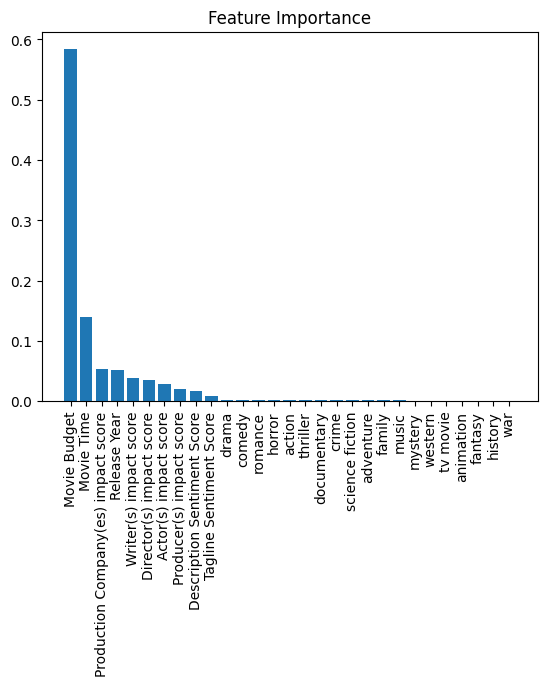

In [233]:
import matplotlib.pyplot as plt
import numpy as np

feature_importances = model.feature_importances_
feature_names = X_train.columns

sorted_idx = np.argsort(feature_importances)[::-1]
plt.bar(range(len(sorted_idx)), feature_importances[sorted_idx])
plt.xticks(range(len(sorted_idx)), [feature_names[i] for i in sorted_idx], rotation=90)
plt.title("Feature Importance")
plt.show()

In [262]:
from sklearn.ensemble import VotingRegressor
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor

ensemble_model = VotingRegressor([
    ('rf', RandomForestRegressor(n_estimators=150,
                                 max_depth=20,
                                 min_samples_split=2,
                                 min_samples_leaf=1,
                                 max_features=None,
                                 random_state=42)),
    ('gb', GradientBoostingRegressor(n_estimators=400,
                                     learning_rate=0.1,
                                     max_depth=4,
                                     random_state=42)),
    ('lr', LinearRegression())
])
ensemble_model.fit(X_train_scaled, y_train)
ensemble_predictions = ensemble_model.predict(X_test_scaled)

print("Ensemble Results:")
ensemble_rmse = np.sqrt(mean_squared_error(y_test, ensemble_predictions))
print(f"Ensemble Model RMSE: {ensemble_rmse}")
ensemble_r2 = r2_score(y_test, ensemble_predictions)
print(f"R² Score: {ensemble_r2:.4f}")
ensemble_mae = mean_absolute_error(y_test, ensemble_predictions)
print(f"Mean Absolute Error (MAE): {ensemble_mae:.2f}")

Ensemble Results:
Ensemble Model RMSE: 2.1261717302033745
R² Score: 0.7771
Mean Absolute Error (MAE): 1.55


In [255]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator=RandomForestRegressor(random_state=42),
          n_features_to_select=10)
X_train_rfe = rfe.fit_transform(X_train_scaled, y_train)
X_test_rfe = rfe.transform(X_test_scaled)

model_rfe = RandomForestRegressor(n_estimators=150,
                                  max_depth=20,
                                  min_samples_split=2,
                                  min_samples_leaf=1,
                                  max_features=None,
                                  random_state=42)
model_rfe.fit(X_train_rfe, y_train)
predictions = model_rfe.predict(X_test_rfe)

print("RFE ResultS:")
rmse_rfe = np.sqrt(mean_squared_error(y_test, predictions))
print(f"Model RMSE: {rmse_rfe}")
r2_rfe = r2_score(y_test, predictions)
print(f"R² Score: {r2_rfe:.4f}")
mae_rfe = mean_absolute_error(y_test, predictions)
print(f"Mean Absolute Error (MAE): {mae_rfe:.2f}")

RFE ResultS:
Model RMSE: 1.992669674847478
R² Score: 0.8042
Mean Absolute Error (MAE): 1.40


In [321]:
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

ridge = Ridge(alpha=7.0)
ridge.fit(X_train_scaled, y_train)
y_pred_ridge = ridge.predict(X_test_scaled)

lasso = Lasso(alpha=0.003)
lasso.fit(X_train_scaled, y_train)
y_pred_lasso = lasso.predict(X_test_scaled)

print("Ridge Results:")
rmse_ridge = np.sqrt(mean_squared_error(y_test, y_pred_ridge))
print(f"RMSE: {rmse_ridge:.4f}")
r2_ridge = r2_score(y_test, y_pred_ridge)
print(f"R² Score: {r2_ridge:.4f}")
mae_ridge = mean_absolute_error(y_test, y_pred_ridge)
print(f"MAE: {mae_ridge:.4f}")

print()
print("Lasso Results:")
rmse_lasso = np.sqrt(mean_squared_error(y_test, y_pred_lasso))
print(f"RMSE: {rmse_lasso:.4f}")
r2_lasso = r2_score(y_test, y_pred_lasso)
print(f"R² Score: {r2_lasso:.4f}")
mae_lasso = mean_absolute_error(y_test, y_pred_lasso)
print(f"MAE: {mae_lasso:.4f}")

Ridge Results:
RMSE: 3.1257
R² Score: 0.5182
MAE: 2.3372

Lasso Results:
RMSE: 3.1377
R² Score: 0.5145
MAE: 2.3100


In [300]:
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

en = ElasticNet(alpha=0.001, l1_ratio=1)
en.fit(X_train_scaled, y_train)
y_pred_en = en.predict(X_test_scaled)

print("ElasticNet Results:")
rmse_en = np.sqrt(mean_squared_error(y_test, y_pred_en))
print(f"RMSE: {rmse_en:.4f}")
r2_en = r2_score(y_test, y_pred_en)
print(f"R² Score: {r2_en:.4f}")
mae_en = mean_absolute_error(y_test, y_pred_en)
print(f"MAE: {mae_en:.4f}")

ElasticNet Results:
RMSE: 3.1436
R² Score: 0.5126
MAE: 2.3083


In [294]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

svr = SVR(kernel='rbf', C=10.0, epsilon=0.05)
svr.fit(X_train_scaled, y_train)
y_pred_svr = svr.predict(X_test_scaled)

print("SVR Results:")
rmse_svr = np.sqrt(mean_squared_error(y_test, y_pred_svr))
print(f"RMSE: {rmse_svr:.4f}")
r2_svr = r2_score(y_test, y_pred_svr)
print(f"R² Score: {r2_svr:.4f}")
mae_svr = mean_absolute_error(y_test, y_pred_svr)
print(f"MAE: {mae_svr:.4f}")

SVR Results:
RMSE: 2.4803
R² Score: 0.6966
MAE: 1.7042


In [295]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

knn = KNeighborsRegressor(n_neighbors=7)
knn.fit(X_train_scaled, y_train)
y_pred_knn = knn.predict(X_test_scaled)

print("KNN Results:")
rmse_knn = np.sqrt(mean_squared_error(y_test, y_pred_knn))
print(f"RMSE: {rmse_knn:.4f}")
r2_knn = r2_score(y_test, y_pred_knn)
print(f"R² Score: {r2_knn:.4f}")
mae_knn = mean_absolute_error(y_test, y_pred_knn)
print(f"MAE: {mae_knn:.4f}")

KNN Results:
RMSE: 2.8481
R² Score: 0.6000
MAE: 2.0744


In [282]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train_scaled, y_train)
y_pred_dt = dt.predict(X_test_scaled)

print("DecisionTreeRegressor Results:")
rmse_dt = np.sqrt(mean_squared_error(y_test, y_pred_dt))
print(f"RMSE: {rmse_dt:.4f}")
r2_dt = r2_score(y_test, y_pred_dt)
print(f"R² Score: {r2_dt:.4f}")
mae_dt = mean_absolute_error(y_test, y_pred_dt)
print(f"MAE: {mae_dt:.4f}")

DecisionTreeRegressor Results:
RMSE: 2.2045
R² Score: 0.7603
MAE: 1.5293


In [271]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

etr = ExtraTreesRegressor(n_estimators=250, random_state=42)
etr.fit(X_train_scaled, y_train)
y_pred_etr = etr.predict(X_test_scaled)

print("AdaBoostRegressor Results:")
rmse_etr = np.sqrt(mean_squared_error(y_test, y_pred_etr))
print(f"RMSE: {rmse_etr:.4f}")
r2_etr = r2_score(y_test, y_pred_etr)
print(f"R² Score: {r2_etr:.4f}")
mae_etr = mean_absolute_error(y_test, y_pred_etr)
print(f"MAE: {mae_etr:.4f}")

AdaBoostRegressor Results:
RMSE: 1.9864
R² Score: 0.8054
MAE: 1.3910


In [265]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

ada = AdaBoostRegressor(n_estimators=400, random_state=42)
ada.fit(X_train_scaled, y_train)
y_pred_ada = ada.predict(X_test_scaled)

print("AdaBoostRegressor Results:")
rmse_ada = np.sqrt(mean_squared_error(y_test, y_pred_ada))
print(f"RMSE: {rmse_ada:.4f}")
r2_ada = r2_score(y_test, y_pred_ada)
print(f"R² Score: {r2_ada:.4f}")
mae_ada = mean_absolute_error(y_test, y_pred_ada)
print(f"MAE: {mae_ada:.4f}")

AdaBoostRegressor Results:
RMSE: 2.5685
R² Score: 0.6747
MAE: 2.0877


In [250]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

gbr = GradientBoostingRegressor(n_estimators=400, learning_rate=0.1, max_depth=4, random_state=42)
gbr.fit(X_train_scaled, y_train)
y_pred_gbr = gbr.predict(X_test_scaled)

print("GradientBoostingRegressor Results:")
rmse_gbr = np.sqrt(mean_squared_error(y_test, y_pred_gbr))
print(f"RMSE: {rmse_gbr:.4f}")
r2_gbr = r2_score(y_test, y_pred_gbr)
print(f"R² Score: {r2_gbr:.4f}")
mae_gbr = mean_absolute_error(y_test, y_pred_gbr)
print(f"MAE: {mae_gbr:.4f}")

GradientBoostingRegressor Results:
RMSE: 1.9821
R² Score: 0.8062
MAE: 1.4028


In [249]:
from xgboost import XGBRegressor

xgb = XGBRegressor(n_estimators=500,
                   learning_rate=0.09,
                   max_depth=4,
                   random_state=42)
xgb.fit(X_train_scaled, y_train)
y_pred_xgb = xgb.predict(X_test_scaled)

print("XGBoost Results:")
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
print(f"RMSE: {rmse_xgb:.4f}")
r2_xgb = r2_score(y_test, y_pred_xgb)
print(f"R² Score: {r2_xgb:.4f}")
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)
print(f"MAE: {mae_xgb:.4f}")

XGBoost Results:
RMSE: 1.9881
R² Score: 0.8051
MAE: 1.4015


In [254]:
import lightgbm as lgb

lgbm = lgb.LGBMRegressor(n_estimators=250,
                         learning_rate=0.07,
                         max_depth=-1,
                         random_state=42,
                         force_col_wise=True)
lgbm.fit(X_train_scaled, y_train)
y_pred_lgbm = lgbm.predict(X_test_scaled)

print("LightGBM Results:")
rmse_lgbm = np.sqrt(mean_squared_error(y_test, y_pred_lgbm))
print(f"RMSE: {rmse_lgbm:.4f}")
r2_lgbm = r2_score(y_test, y_pred_lgbm)
print(f"R² Score: {r2_lgbm:.4f}")
mae_lgbm = mean_absolute_error(y_test, y_pred_lgbm)
print(f"MAE: {mae_lgbm:.4f}")

[LightGBM] [Info] Total Bins 2345
[LightGBM] [Info] Number of data points in the train set: 15976, number of used features: 29
[LightGBM] [Info] Start training from score 15.019832
LightGBM Results:
RMSE: 1.9569
R² Score: 0.8111
MAE: 1.3759


In [247]:
from catboost import CatBoostRegressor

catboost = CatBoostRegressor(iterations=300,
                             learning_rate=0.09,
                             depth=9,
                             random_state=42,
                             verbose=0)
catboost.fit(X_train_scaled, y_train)
y_pred_cat = catboost.predict(X_test_scaled)

print("CatBoost Results:")
rmse_cat = np.sqrt(mean_squared_error(y_test, y_pred_cat))
print(f"RMSE: {rmse_cat:.4f}")
r2_cat = r2_score(y_test, y_pred_cat)
print(f"R² Score: {r2_cat:.4f}")
mae_cat = mean_absolute_error(y_test, y_pred_cat)
print(f"MAE: {mae_cat:.4f}")

CatBoost Results:
RMSE: 1.9519
R² Score: 0.8121
MAE: 1.3703


In [246]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np

pca = PCA(n_components=0.75)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

model_pca = RandomForestRegressor(n_estimators=150, max_depth=20, min_samples_split=2, min_samples_leaf=1, max_features=None, random_state=42)
model_pca.fit(X_train_pca, y_train)

y_pred_pca = model_pca.predict(X_test_pca)

print("Model with PCA:")
rmse_pca = np.sqrt(mean_squared_error(y_test, y_pred_pca))
print(f"RMSE: {rmse_pca:.4f}")
r2_pca = r2_score(y_test, y_pred_pca)
print(f"R² Score: {r2_pca:.4f}")
mae_pca = mean_absolute_error(y_test, y_pred_pca)
print(f"MAE: {mae_pca:.4f}")

Model with PCA:
RMSE: 2.6437
R² Score: 0.6553
MAE: 1.8546


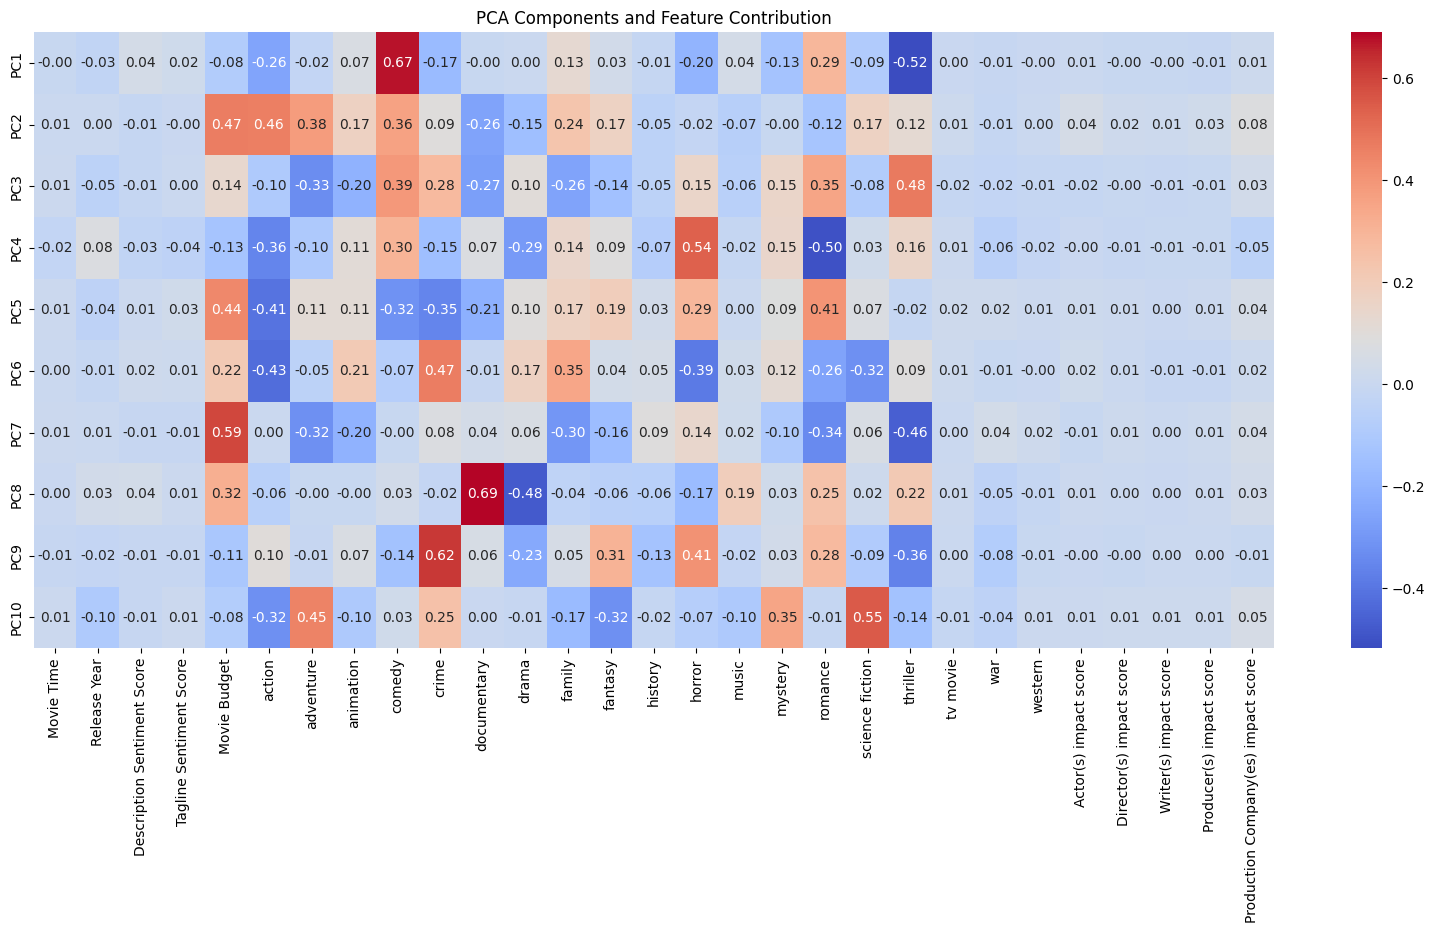

In [239]:
pca_components = pd.DataFrame(
    pca.components_,
    columns=X_train.columns,
    index=[f'PC{i+1}' for i in range(pca.n_components_)]
)

plt.figure(figsize=(20, 8))
sns.heatmap(pca_components, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("PCA Components and Feature Contribution")
plt.show()

In [327]:
results = {
    "Model": ["Ridge Regression",
              "Lasso Regression",
              "Elastic Net",
              "KNN",
              "Ada Boost",
              "Decision Tree",
              "Ensemble (RF + GB + LR)",
              "Random Forest (All features)",
              "Random Forest (Feature selection: 10)",
              "Gradient Boosting",
              "XGBoost",
              "Light GBM",
              "CatBoost",
              "PCA - top 10 components"],
    "RMSE": [rmse_ridge,
             rmse_lasso,
             rmse_en,
             rmse_knn,
             rmse_ada,
             rmse_dt,
             ensemble_rmse,
             rmse_rf,
             rmse_rfe,
             rmse_gbr,
             rmse_xgb,
             rmse_lgbm,
             rmse_cat,
             rmse_pca],
    "R² Score": [r2_ridge,
                 r2_lasso,
                 r2_en,
                 r2_knn,
                 r2_ada,
                 r2_dt,
                 ensemble_r2,
                 r2_rf,
                 r2_rfe,
                 r2_gbr,
                 r2_xgb,
                 r2_lgbm,
                 r2_cat,
                 r2_pca],
    "MAE": [mae_ridge,
            mae_lasso,
            mae_en,
            mae_knn,
            mae_ada,
            mae_dt,
            ensemble_mae,
            mae_rf,
            mae_rfe,
            mae_gbr,
            mae_xgb,
            mae_lgbm,
            mae_cat,
            mae_pca]
}

results_df = pd.DataFrame(results)
results_df

,Model,RMSE,R² Score,MAE
0,Ridge Regression,3.125747,0.518158,2.337167
1,Lasso Regression,3.137679,0.514473,2.309979
2,Elastic Net,3.143643,0.512625,2.308342
3,KNN,2.848055,0.599969,2.074419
4,Ada Boost,2.568481,0.674651,2.087669
5,Decision Tree,2.204506,0.760327,1.529299
6,Ensemble (RF + GB + LR),2.126172,0.777057,1.548371
7,Random Forest (All features),1.975257,0.807583,1.380623
8,Random Forest (Feature selection: 10),1.992670,0.804175,1.395387
9,Gradient Boosting,1.982148,0.806238,1.402819


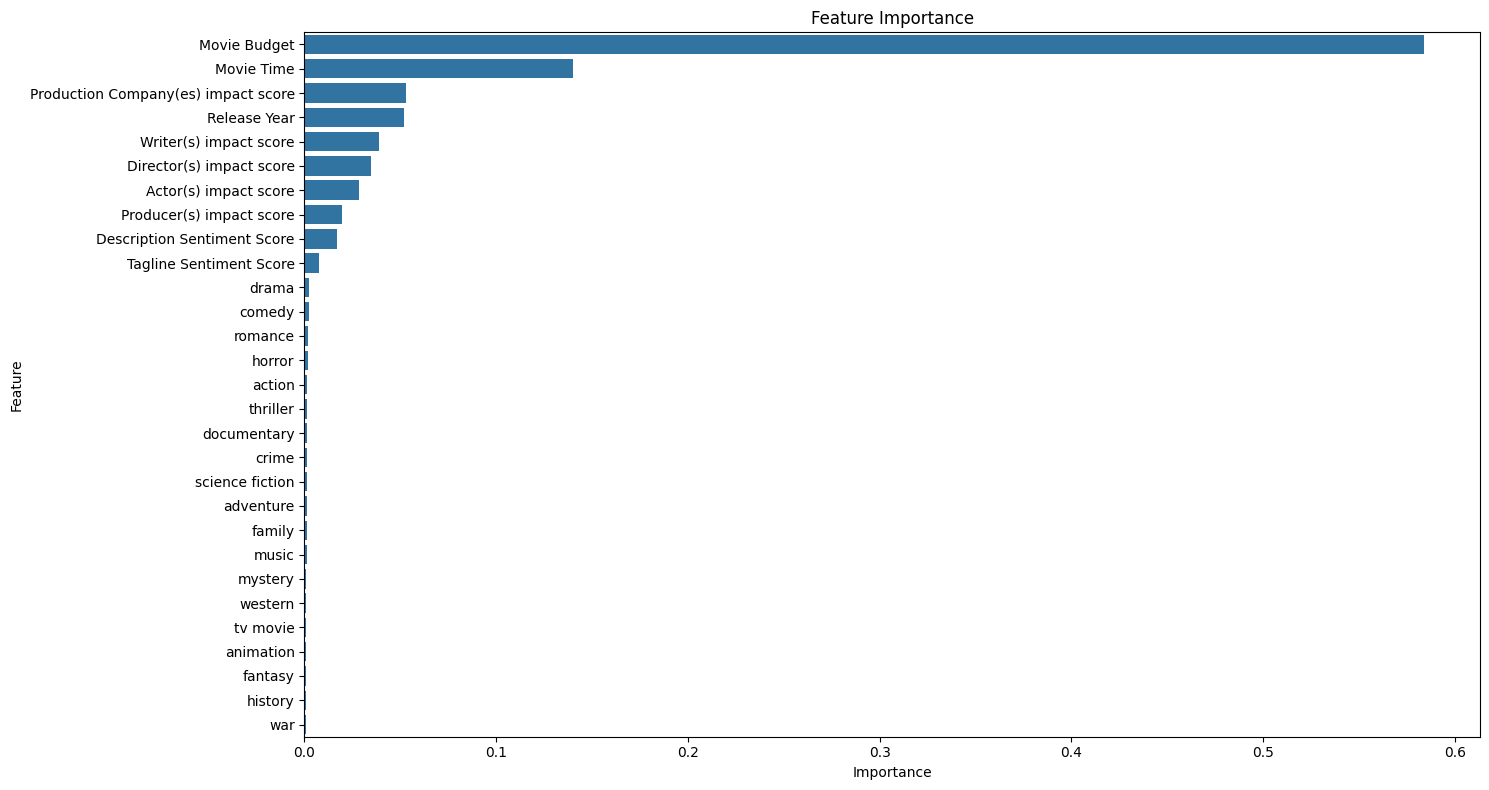

In [242]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

feature_importances = model.feature_importances_
feature_names = X_train.columns
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': feature_importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importance
plt.figure(figsize=(15, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df)
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()

In [375]:
top_actors = pd.DataFrame(sorted_actors).head(15)
top_actors.rename(columns={'person': 'Name', 
                           'normalized_person_value': 'Final Score',
                           'total_person_value': 'Weighted Value',
                           'profitability': 'Total Profitability',
                           'normalized_profitability': 'Normalized Profitability',
                           'box_office_performance': 'Box Office Avg Performance',
                           'appearance_count': 'Appearances',
                           'weighted_avg_imdb': 'Avg IMDb Rating',
                           'movies': 'Movies'}, inplace=True)
top_actors.index = top_actors.index + 1
top_actors.index.name = "Rank"
top_actors['Total Profitability'] = top_actors['Total Profitability'].apply(lambda x: f"${round(x / 1_000_000_000, 2)} B")
top_actors['Final Score'] = top_actors['Final Score'].apply(lambda x: f"{round(x, 2)}")
top_actors['Weighted Value'] = top_actors['Weighted Value'].apply(lambda x: f"{round(x, 2)}")
top_actors['Normalized Profitability'] = top_actors['Normalized Profitability'].apply(lambda x: f"${round(x, 2)}")
top_actors['Box Office Avg Performance'] = top_actors['Box Office Avg Performance'].apply(lambda x: f"{round(x, 2)}")
top_actors['Avg IMDb Rating'] = top_actors['Avg IMDb Rating'].apply(lambda x: f"{round(x, 2)}")
top_actors[['Name', 'Final Score', 'Weighted Value', 'Total Profitability', 'Normalized Profitability','Box Office Avg Performance','Appearances', 'Avg IMDb Rating']]

,Name,Final Score,Weighted Value,Total Profitability,Normalized Profitability,Box Office Avg Performance,Appearances,Avg IMDb Rating
Rank,,,,,,,,
1,Samuel L. Jackson,1289.16,44.63,$28.83 B,$71.36,3.29,131,6.4
2,Willem Dafoe,738.07,50.4,$14.45 B,$35.66,2.82,98,6.69
3,Chris Evans,614.69,34.87,$17.3 B,$42.73,3.56,43,7.02
4,J.K. Simmons,489.8,40.79,$11.79 B,$29.05,2.94,74,6.68
5,Matt Damon,471.22,38.78,$11.94 B,$29.43,2.75,76,6.7
6,Bruce Willis,465.95,27.08,$17.59 B,$43.45,2.86,120,4.69
7,Stan Lee,442.16,13.63,$32.14 B,$79.58,4.32,44,7.02
8,Ralph Fiennes,402.6,26.23,$15.02 B,$37.07,3.71,50,6.93
9,Sebastian Stan,400.18,33.97,$11.41 B,$28.1,4.09,32,6.88


C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\1411268230.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Score', y='Name', data=top_actors, palette='viridis')


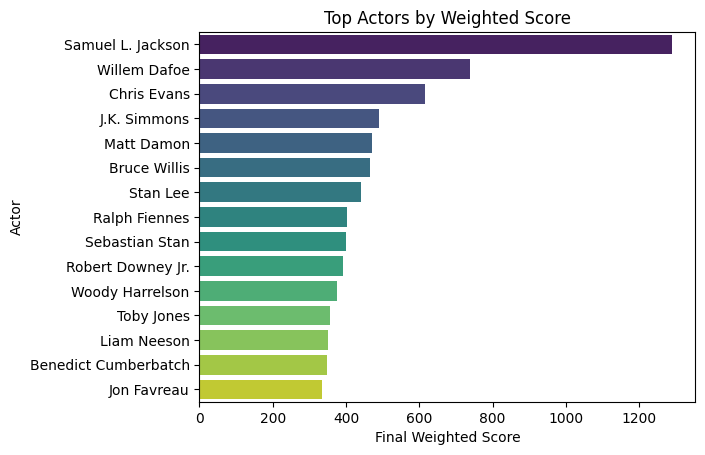

In [365]:
sns.barplot(x='Final Score', y='Name', data=top_actors, palette='viridis')
plt.title('Top Actors by Weighted Score')
plt.xlabel('Final Weighted Score')
plt.ylabel('Actor')
plt.show()

In [381]:
top_directors = pd.DataFrame(sorted_directors).head(15)
top_directors.rename(columns={'person': 'Name', 
                           'normalized_person_value': 'Final Score',
                           'total_person_value': 'Weighted Value',
                           'profitability': 'Total Profitability',
                           'normalized_profitability': 'Normalized Profitability',
                           'box_office_performance': 'Box Office Avg Performance',
                           'appearance_count': 'Appearances',
                           'weighted_avg_imdb': 'Avg IMDb Rating',
                           'movies': 'Movies'}, inplace=True)
top_directors.index = top_directors.index + 1
top_directors.index.name = "Rank"
top_directors['Total Profitability'] = top_directors['Total Profitability'].apply(lambda x: f"${round(x / 1_000_000_000, 2)} B")
top_directors['Final Score'] = top_directors['Final Score'].apply(lambda x: f"{round(x, 2)}")
top_directors['Weighted Value'] = top_directors['Weighted Value'].apply(lambda x: f"{round(x, 2)}")
top_directors['Normalized Profitability'] = top_directors['Normalized Profitability'].apply(lambda x: f"${round(x, 2)}")
top_directors['Box Office Avg Performance'] = top_directors['Box Office Avg Performance'].apply(lambda x: f"{round(x, 2)}")
top_directors['Avg IMDb Rating'] = top_directors['Avg IMDb Rating'].apply(lambda x: f"{round(x, 2)}")
top_directors[['Name', 'Final Score', 'Weighted Value', 'Total Profitability', 'Normalized Profitability','Box Office Avg Performance','Appearances', 'Avg IMDb Rating']]

,Name,Final Score,Weighted Value,Total Profitability,Normalized Profitability,Box Office Avg Performance,Appearances,Avg IMDb Rating
Rank,,,,,,,,
1,Steven Spielberg,333.06,15.48,$21.86 B,$51.64,6.68,36,7.29
2,Sam Liu,146.78,17.01,$8.7 B,$20.41,4.6,21,6.52
3,Robert Zemeckis,102.45,15.78,$6.59 B,$15.38,3.61,22,6.35
4,Ridley Scott,102.15,21.88,$4.69 B,$10.89,2.38,28,6.61
5,Clint Eastwood,101.03,21.97,$4.45 B,$10.32,3.07,40,6.98
6,Matt Peters,85.65,12.16,$6.94 B,$16.23,6.19,9,6.35
7,Tim Burton,80.98,14.16,$5.66 B,$13.19,3.31,20,6.82
8,Ron Howard,75.16,13.09,$5.66 B,$13.17,2.85,27,7.05
9,Peter Jackson,73.7,8.87,$7.91 B,$18.53,4.26,14,8.16


C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\3216969639.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Score', y='Name', data=top_directors, palette='viridis')


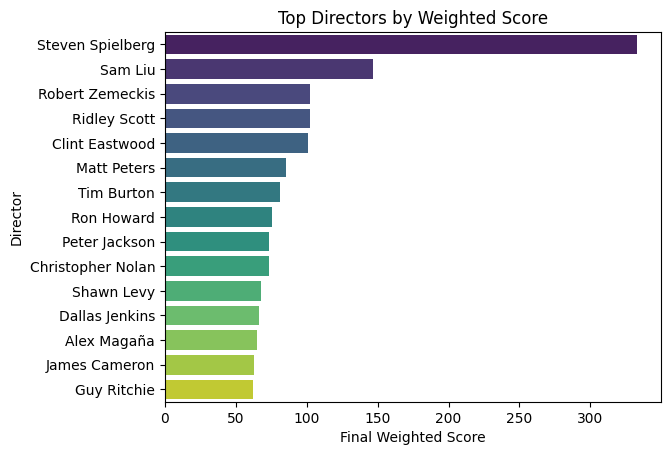

In [380]:
sns.barplot(x='Final Score', y='Name', data=top_directors, palette='viridis')
plt.title('Top Directors by Weighted Score')
plt.xlabel('Final Weighted Score')
plt.ylabel('Director')
plt.show()

In [385]:
top_writers = pd.DataFrame(sorted_writers).head(15)
top_writers.rename(columns={'person': 'Name', 
                           'normalized_person_value': 'Final Score',
                           'total_person_value': 'Weighted Value',
                           'profitability': 'Total Profitability',
                           'normalized_profitability': 'Normalized Profitability',
                           'box_office_performance': 'Box Office Avg Performance',
                           'appearance_count': 'Appearances',
                           'weighted_avg_imdb': 'Avg IMDb Rating',
                           'movies': 'Movies'}, inplace=True)
top_writers.index = top_writers.index + 1
top_writers.index.name = "Rank"
top_writers['Total Profitability'] = top_writers['Total Profitability'].apply(lambda x: f"${round(x / 1_000_000_000, 2)} B")
top_writers['Final Score'] = top_writers['Final Score'].apply(lambda x: f"{round(x, 2)}")
top_writers['Weighted Value'] = top_writers['Weighted Value'].apply(lambda x: f"{round(x, 2)}")
top_writers['Normalized Profitability'] = top_writers['Normalized Profitability'].apply(lambda x: f"${round(x, 2)}")
top_writers['Box Office Avg Performance'] = top_writers['Box Office Avg Performance'].apply(lambda x: f"{round(x, 2)}")
top_writers['Avg IMDb Rating'] = top_writers['Avg IMDb Rating'].apply(lambda x: f"{round(x, 2)}")
top_writers[['Name', 'Final Score', 'Weighted Value', 'Total Profitability', 'Normalized Profitability','Box Office Avg Performance','Appearances', 'Avg IMDb Rating']]

,Name,Final Score,Weighted Value,Total Profitability,Normalized Profitability,Box Office Avg Performance,Appearances,Avg IMDb Rating
Rank,,,,,,,,
1,Stan Lee,1167.71,31.57,$38.61 B,$91.39,4.1,47,6.53
2,Jack Kirby,1018.32,31.76,$33.31 B,$78.82,3.99,50,6.94
3,Bob Kane,675.63,30.51,$22.96 B,$54.26,4.12,50,6.57
4,Bill Finger,384.16,28.1,$14.03 B,$33.04,4.41,28,6.53
5,George Lucas,293.09,11.58,$26.06 B,$61.61,6.13,28,6.81
6,Jerry Siegel,275.51,21.61,$13.1 B,$30.83,3.75,30,6.59
7,Joe Shuster,219.65,17.93,$12.57 B,$29.58,3.73,29,6.61
8,Jeremy Adams,149.11,16.74,$8.85 B,$20.76,6.69,13,6.4
9,Stephen King,133.55,17.19,$8.09 B,$18.94,3.36,59,5.9


C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\1626607428.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Score', y='Name', data=top_writers, palette='viridis')


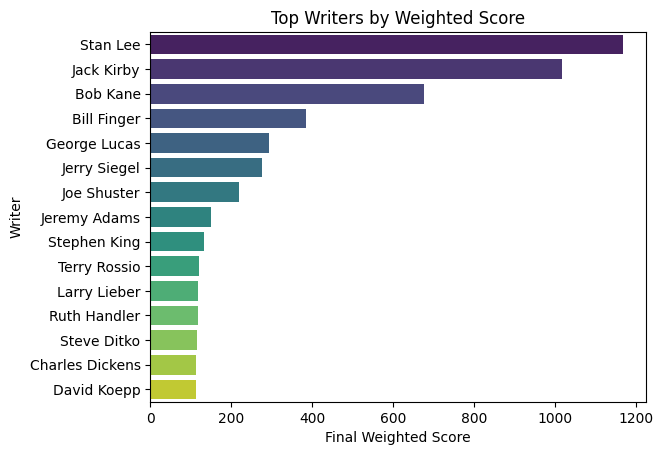

In [384]:
sns.barplot(x='Final Score', y='Name', data=top_writers, palette='viridis')
plt.title('Top Writers by Weighted Score')
plt.xlabel('Final Weighted Score')
plt.ylabel('Writer')
plt.show()

In [388]:
top_producers = pd.DataFrame(sorted_producers).head(15)
top_producers.rename(columns={'person': 'Name', 
                           'normalized_person_value': 'Final Score',
                           'total_person_value': 'Weighted Value',
                           'profitability': 'Total Profitability',
                           'normalized_profitability': 'Normalized Profitability',
                           'box_office_performance': 'Box Office Avg Performance',
                           'appearance_count': 'Appearances',
                           'weighted_avg_imdb': 'Avg IMDb Rating',
                           'movies': 'Movies'}, inplace=True)
top_producers.index = top_producers.index + 1
top_producers.index.name = "Rank"
top_producers['Total Profitability'] = top_producers['Total Profitability'].apply(lambda x: f"${round(x / 1_000_000_000, 2)} B")
top_producers['Final Score'] = top_producers['Final Score'].apply(lambda x: f"{round(x, 2)}")
top_producers['Weighted Value'] = top_producers['Weighted Value'].apply(lambda x: f"{round(x, 2)}")
top_producers['Normalized Profitability'] = top_producers['Normalized Profitability'].apply(lambda x: f"${round(x, 2)}")
top_producers['Box Office Avg Performance'] = top_producers['Box Office Avg Performance'].apply(lambda x: f"{round(x, 2)}")
top_producers['Avg IMDb Rating'] = top_producers['Avg IMDb Rating'].apply(lambda x: f"{round(x, 2)}")
top_producers[['Name', 'Final Score', 'Weighted Value', 'Total Profitability', 'Normalized Profitability','Box Office Avg Performance','Appearances', 'Avg IMDb Rating']]

,Name,Final Score,Weighted Value,Total Profitability,Normalized Profitability,Box Office Avg Performance,Appearances,Avg IMDb Rating
Rank,,,,,,,,
1,Sam Register,2258.69,60.48,$38.92 B,$92.15,5.41,78,6.34
2,Louis D'Esposito,1951.85,54.59,$37.09 B,$87.79,4.56,49,7.12
3,Kevin Feige,1439.03,35.05,$42.72 B,$101.16,4.17,64,7.07
4,Victoria Alonso,1413.13,42.82,$34.19 B,$80.91,4.72,42,7.08
5,Jason Blum,1316.99,73.3,$18.8 B,$44.37,4.96,115,5.52
6,Steven Spielberg,1103.67,38.87,$29.51 B,$69.8,3.69,88,6.81
7,Stan Lee,889.79,24.1,$38.45 B,$91.01,3.98,63,6.88
8,Harvey Weinstein,806.91,47.18,$17.84 B,$42.1,2.76,228,6.34
9,Bob Weinstein,762.61,43.38,$18.35 B,$43.3,2.79,225,6.3


C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\1268716355.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Score', y='Name', data=top_producers, palette='viridis')


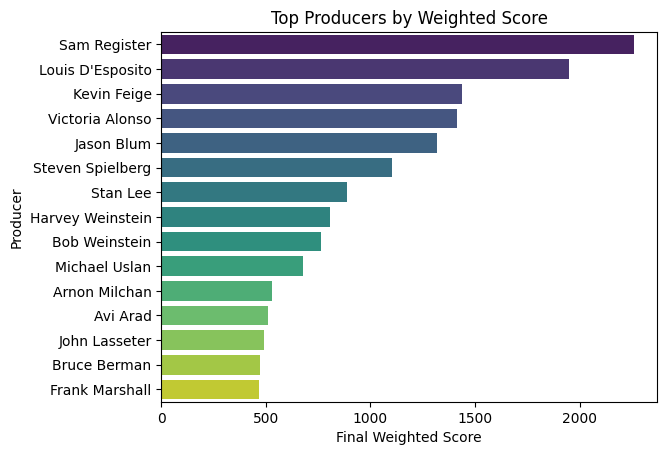

In [387]:
sns.barplot(x='Final Score', y='Name', data=top_producers, palette='viridis')
plt.title('Top Producers by Weighted Score')
plt.xlabel('Final Weighted Score')
plt.ylabel('Producer')
plt.show()

In [392]:
top_production_companies = pd.DataFrame(sorted_production_companies).head(15)
top_production_companies.rename(columns={'person': 'Name', 
                           'normalized_person_value': 'Final Score',
                           'total_person_value': 'Weighted Value',
                           'profitability': 'Total Profitability',
                           'normalized_profitability': 'Normalized Profitability',
                           'box_office_performance': 'Box Office Avg Performance',
                           'appearance_count': 'Appearances',
                           'weighted_avg_imdb': 'Avg IMDb Rating',
                           'movies': 'Movies'}, inplace=True)
top_production_companies.index = top_production_companies.index + 1
top_production_companies.index.name = "Rank"
top_production_companies['Total Profitability'] = top_production_companies['Total Profitability'].apply(lambda x: f"${round(x / 1_000_000_000, 2)} B")
top_production_companies['Final Score'] = top_production_companies['Final Score'].apply(lambda x: f"{round(x, 2)}")
top_production_companies['Weighted Value'] = top_production_companies['Weighted Value'].apply(lambda x: f"{round(x, 2)}")
top_production_companies['Normalized Profitability'] = top_production_companies['Normalized Profitability'].apply(lambda x: f"${round(x, 2)}")
top_production_companies['Box Office Avg Performance'] = top_production_companies['Box Office Avg Performance'].apply(lambda x: f"{round(x, 2)}")
top_production_companies['Avg IMDb Rating'] = top_production_companies['Avg IMDb Rating'].apply(lambda x: f"{round(x, 2)}")
top_production_companies[['Name', 'Final Score', 'Weighted Value', 'Total Profitability', 'Normalized Profitability','Box Office Avg Performance','Appearances', 'Avg IMDb Rating']]

,Name,Final Score,Weighted Value,Total Profitability,Normalized Profitability,Box Office Avg Performance,Appearances,Avg IMDb Rating
Rank,,,,,,,,
1,Universal Pictures,26520.51,260.6,$107.04 B,$253.85,2.79,822,6.2
2,Warner Bros. Pictures,19915.36,210.89,$99.3 B,$235.46,2.36,890,6.4
3,Paramount Pictures,19118.65,206.37,$97.39 B,$230.94,2.74,694,6.35
4,Columbia Pictures,18567.81,201.04,$97.11 B,$230.27,2.73,663,6.28
5,20th Century Fox,12847.24,97.8,$138.14 B,$327.66,3.45,639,6.25
6,Walt Disney Pictures,9630.02,144.83,$69.79 B,$165.41,2.96,254,6.5
7,Metro-Goldwyn-Mayer,9064.54,110.35,$86.33 B,$204.67,2.81,633,6.35
8,Warner Bros. Animation,6107.42,95.36,$67.08 B,$158.98,5.1,124,6.32
9,New Line Cinema,3691.72,106.75,$36.3 B,$85.92,2.94,309,6.1


C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\1616379574.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Final Score', y='Name', data=top_production_companies, palette='viridis')


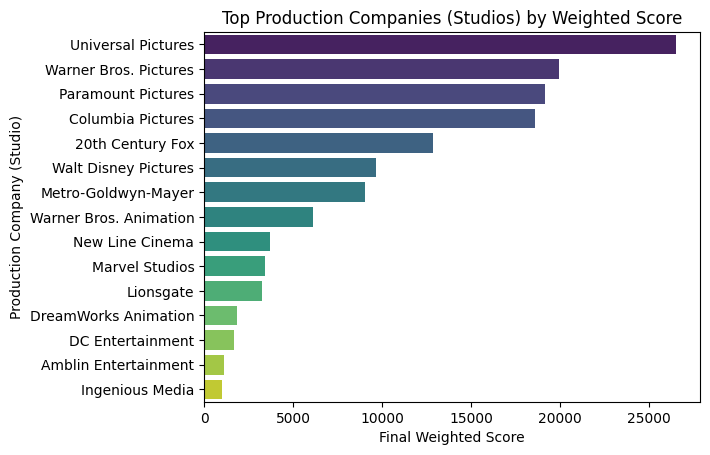

In [391]:
sns.barplot(x='Final Score', y='Name', data=top_production_companies, palette='viridis')
plt.title('Top Production Companies (Studios) by Weighted Score')
plt.xlabel('Final Weighted Score')
plt.ylabel('Production Company (Studio)')
plt.show()

C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\2212278777.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')


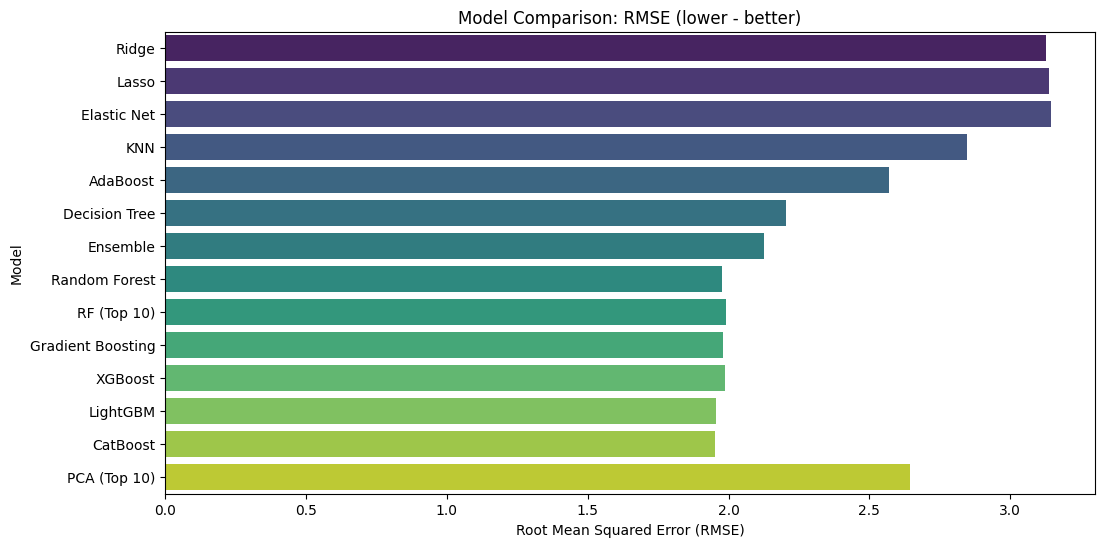

C:\Users\delsa\AppData\Local\Temp\ipykernel_96400\2212278777.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='R² Score', y='Model', data=results_df, palette='coolwarm')


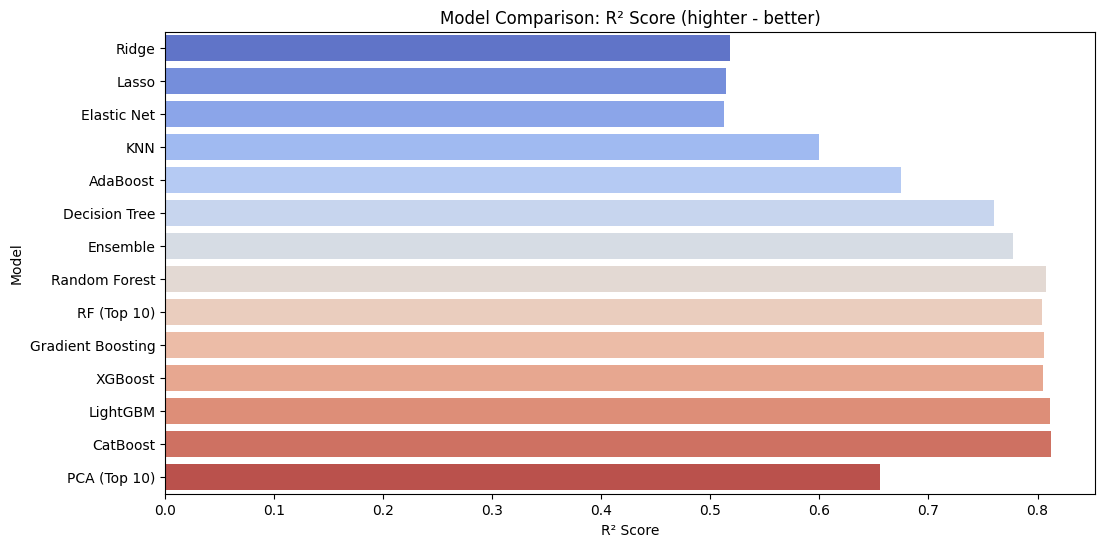

In [394]:
import matplotlib.pyplot as plt
import seaborn as sns

# RMSE
plt.figure(figsize=(12, 6))
sns.barplot(x='RMSE', y='Model', data=results_df, palette='viridis')
plt.title('Model Comparison: RMSE (lower - better)')
plt.xlabel('Root Mean Squared Error (RMSE)')
plt.ylabel('Model')
plt.show()

# R² Score
plt.figure(figsize=(12, 6))
sns.barplot(x='R² Score', y='Model', data=results_df, palette='coolwarm')
plt.title('Model Comparison: R² Score (highter - better)')
plt.xlabel('R² Score')
plt.ylabel('Model')
plt.show()